In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [19]:
pd.concat([pd.DataFrame(), pd.read_csv('./data/' + '2000.tsv', sep='\t')])

,date,min,max
0,1/1/2000,NaN,NaN
1,2/1/2000,NaN,NaN
2,3/1/2000,NaN,NaN
3,4/1/2000,NaN,NaN
4,5/1/2000,NaN,NaN
...,...,...,...
361,27/12/2000,9.0,11.0
362,28/12/2000,7.0,12.0
363,29/12/2000,6.0,9.0
364,30/12/2000,5.0,10.0


In [23]:
df = pd.DataFrame()

for db in os.listdir('./data/'):
    df = pd.concat([df, pd.read_csv('./data/' + db, sep='\t')], ignore_index=True)

df.head()

,date,min,max
0,1/1/2018,7.0,13.0
1,2/1/2018,-1.0,7.0
2,3/1/2018,-1.0,10.0
3,4/1/2018,5.0,13.0
4,5/1/2018,5.0,15.0


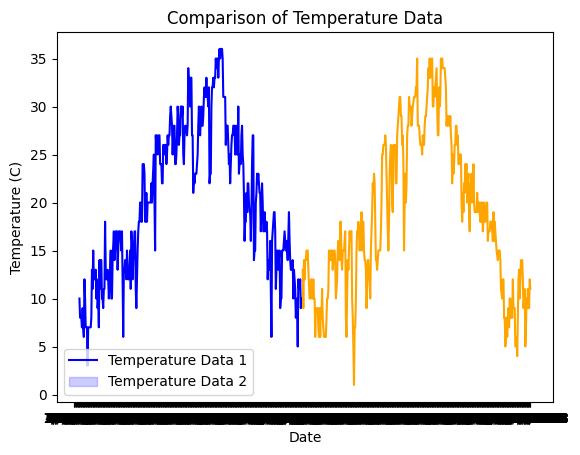

In [2]:
# import data
df1 = pd.read_csv('./data/2000.tsv', sep="\t")
df2 = pd.read_csv('./data/1998.tsv', sep="\t")

# create line plots
sns.lineplot(x='date', y='max', data=df1, color='blue')
sns.lineplot(x='date', y='max', data=df2, color='orange')

# add labels and title
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('Comparison of Temperature Data')
plt.legend(['Temperature Data 1', 'Temperature Data 2'])
plt.show()

In [21]:
df1 = pd.read_csv('./data/1998.tsv', sep="\t")
df1.